# Lab1 Datahantering - Covid-19

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import warnings
warnings.filterwarnings(category=FutureWarning, action="ignore")
warnings.filterwarnings(category=UserWarning, action="ignore")

### Uppgift 1:
- Read in "Veckodata Riket" sheet in Excel file.

In [3]:
covid = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name='Veckodata Riket')

#### Uppgift 1a:
- Doing initial analysis of the dataset:
- .head(), .info, .info(), .describe, shape() etc

In [4]:
covid.head(10)

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.000000,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.000000,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.000000,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.000000,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.000000,0,0.000000
5,2020,11,838,8,10,1063,10,16,19,5,0.500000,5,0.500000
6,2020,12,924,9,17,1987,19,88,107,44,4.300000,49,4.700000
7,2020,13,1957,19,28,3944,38,238,345,190,18.400000,239,23.100000
8,2020,14,3229,31,50,7173,69,277,622,451,43.700001,690,66.800003
9,2020,15,3740,36,67,10913,106,289,911,664,64.300003,1354,131.100006


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [6]:
covid.describe

<bound method NDFrame.describe of        år  veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  \
0    2020            6                 1                           0   
1    2020            7                 0                           0   
2    2020            8                 0                           0   
3    2020            9                13                           0   
4    2020           10               211                           2   
..    ...          ...               ...                         ...   
137  2022           38              4669                          45   
138  2022           39             13532                         130   
139  2022           40              3999                          39   
140  2022           41              3408                          33   
141  2022           42              3279                          32   

     Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  \
0                           

In [7]:
rows, cols = covid.shape
print(f'Number of rows: {rows}\nNumber of cols: {cols}')

Number of rows: 142
Number of cols: 13


In [8]:
covid.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [9]:
covid.index

RangeIndex(start=0, stop=142, step=1)

#### Uppgift 1b:
- Slår ihop kolumnerna år och veckonummer till en kolumn med formatet 'ÅÅÅÅvVV'.

In [10]:
covid['år'] = covid['år'].astype(str)
covid['veckonummer'] = covid['veckonummer'].astype(str)
covid['Vecka'] = covid['år'] + "v" + covid['veckonummer']

# castar 'år' och 'veckonummer' till dtype 'int'
covid['år'] = covid['år'].astype(int)
covid['veckonummer'] = covid['veckonummer'].astype(int)

covid.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0,2020v6
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v7
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v8
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0,2020v9
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0,2020v10


#### Uppgift 1c
- c: Linjediagram med antal avlidna per vecka. Seaborn och Plotly Express.

([<matplotlib.axis.XTick at 0x1e3fa475d10>,
 [Text(1, 0, '2020v6'),
  Text(13, 0, '2020v18'),
  Text(25, 0, '2020v30'),
  Text(37, 0, '2020v42'),
  Text(49, 0, '2021v1'),
  Text(61, 0, '2021v13'),
  Text(73, 0, '2021v25'),
  Text(85, 0, '2021v37'),
  Text(97, 0, '2021v49'),
  Text(109, 0, '2022v9'),
  Text(121, 0, '2022v21'),
  Text(133, 0, '2022v33')])

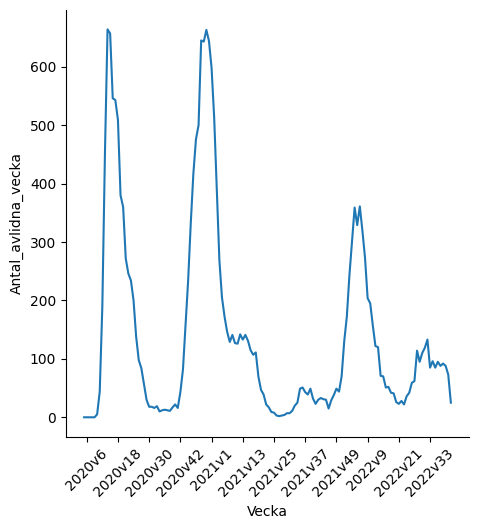

In [11]:
# 1c Seaborn:
sns.relplot(x='Vecka', y='Antal_avlidna_vecka', kind='line', data=covid)
loc, labels = plt.xticks()
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)

In [12]:
# 1c, Plotly Express:
px.line(covid, x='Vecka', y='Antal_avlidna_vecka')

#### Uppgift 1d:
- d: Linjediagram med antal fall per vecka.

([<matplotlib.axis.XTick at 0x1e3fddeee50>,
 [Text(1, 0, '2020v6'),
  Text(13, 0, '2020v18'),
  Text(25, 0, '2020v30'),
  Text(37, 0, '2020v42'),
  Text(49, 0, '2021v1'),
  Text(61, 0, '2021v13'),
  Text(73, 0, '2021v25'),
  Text(85, 0, '2021v37'),
  Text(97, 0, '2021v49'),
  Text(109, 0, '2022v9'),
  Text(121, 0, '2022v21'),
  Text(133, 0, '2022v33')])

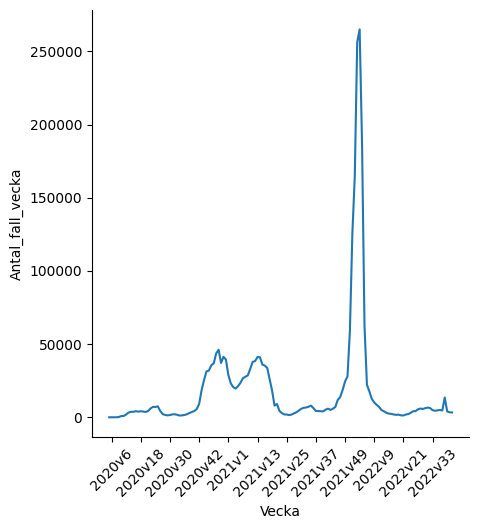

In [13]:
# 1d Seaborn
sns.relplot(x='Vecka', y='Antal_fall_vecka', kind='line', data=covid)
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)

In [14]:
# 1d Plotly Express
px.line(covid, x='Vecka', y='Antal_fall_vecka')

#### Uppgift 1e
- Linjediagram med antal avlidna per vecka och antal fall per vecka.

([<matplotlib.axis.XTick at 0x1e3fde5fd90>,
 [Text(1, 0, '2020v6'),
  Text(13, 0, '2020v18'),
  Text(25, 0, '2020v30'),
  Text(37, 0, '2020v42'),
  Text(49, 0, '2021v1'),
  Text(61, 0, '2021v13'),
  Text(73, 0, '2021v25'),
  Text(85, 0, '2021v37'),
  Text(97, 0, '2021v49'),
  Text(109, 0, '2022v9'),
  Text(121, 0, '2022v21'),
  Text(133, 0, '2022v33')])

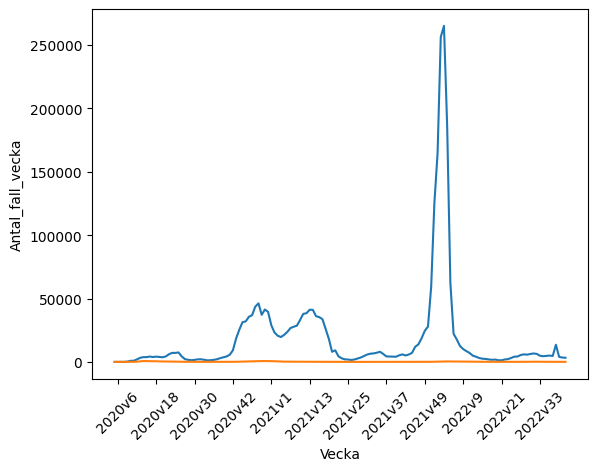

In [15]:
# 1e Seaborn
sns.lineplot(x='Vecka', y='Antal_fall_vecka', data=covid)
sns.lineplot(x='Vecka', y='Antal_avlidna_vecka', data=covid)
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)

In [16]:
# 1e Plotly Express:
x=covid['Vecka']
y1=covid['Antal_avlidna_vecka']
y2=covid['Antal_fall_vecka']

fig = px.line(covid, x=x, y=y1)
fig.add_scatter(x=x, y=y2, yaxis='y2', mode='lines')
fig.update_layout(yaxis2=dict(overlaying="y", side="right"))
fig.show()

#### Uppgift 1f
- Kumulativt antal smittade.

([<matplotlib.axis.XTick at 0x1e3fe281b90>,
 [Text(1, 0, '2020v6'),
  Text(13, 0, '2020v18'),
  Text(25, 0, '2020v30'),
  Text(37, 0, '2020v42'),
  Text(49, 0, '2021v1'),
  Text(61, 0, '2021v13'),
  Text(73, 0, '2021v25'),
  Text(85, 0, '2021v37'),
  Text(97, 0, '2021v49'),
  Text(109, 0, '2022v9'),
  Text(121, 0, '2022v21'),
  Text(133, 0, '2022v33')])

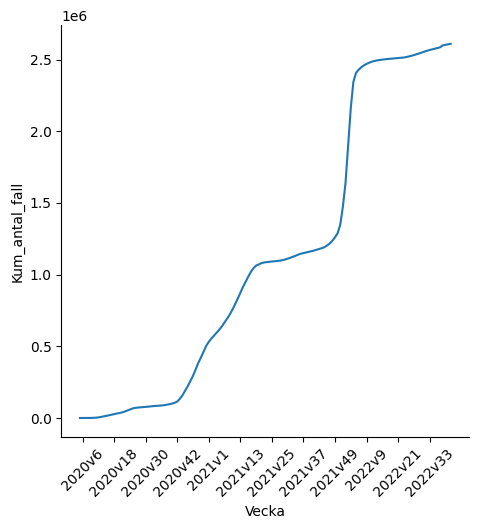

In [17]:
# 1f Seaborn
sns.relplot(x='Vecka', y='Kum_antal_fall', kind='line',data=covid)
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)

In [18]:
# 1f Plotly Express
px.line(covid, x='Vecka', y='Kum_antal_fall')

#### Uppgift 2
- Läser in datasetet med vaccin data och tittar lite översiktligt på det.

In [19]:
vaccin = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")

In [20]:
vaccin.head(3)

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN


In [21]:
vaccin.columns

Index(['Län', 'Län_namn', 'Kommun', 'Kommun_namn', 'Ålder', 'Befolkning',
       'Antal minst 1 dos', 'Antal minst 2 doser', 'Antal 3 doser',
       'Antal 4 doser', 'Andel minst 1 dos', 'Andel minst 2 doser',
       'Andel 3 doser', 'Andel 4 doser'],
      dtype='object')

Kollar vilka län som finns representerade i "Län_namn" kolumnen.

In [22]:
vaccin['Län_namn'].unique()

array(['Stockholms län', 'Uppsala län', 'Södermanlands län',
       'Östergötlands län', 'Jönköpings län', 'Kronobergs län',
       'Kalmar län', 'Gotlands län', 'Blekinge län', 'Skåne län',
       'Hallands län', 'Västra Götalands län', 'Värmlands län',
       'Örebro län', 'Västmanlands län', 'Dalarnas län', 'Gävleborgs län',
       'Västernorrlands län', 'Jämtlands län', 'Västerbottens län',
       'Norrbottens län'], dtype=object)

#### Uppgift 2a
- Uppgift: Hur många unika län det finns i datasetet.
- Använder kolumnen "Län_namn", använder len() och unique() funktionerna.

In [23]:
antal_län = len(vaccin['Län_namn'].unique())
print(f'Det finns {antal_län} län i datasetet.')

Det finns 21 län i datasetet.


#### Uppgift 2b
- Uppgift: hur många kommuner det finns i datasetet.
- Använder len() och unique().

In [24]:
antal_kommuner = len(vaccin['Kommun_namn'].unique())
print(f'Det finns {antal_kommuner} kommuner i datasetet.')

Det finns 290 kommuner i datasetet.


#### Uppgift 2c
- Uppgift: Hur stor befolkning finns representerat i datasetet.

In [25]:
befolkning = vaccin['Befolkning'].sum()
formatted_befolkning = "{:,.0f}".format(befolkning)
#print(type(formatted_befolkning))
print(f'Det är {formatted_befolkning} antal personer i datasetet.')
print(f'Det kan avrundas till {"{:,.0f}".format(round(befolkning,-5))} personer.')

Det är 9,092,790 antal personer i datasetet.
Det kan avrundas till 9,100,000 personer.


#### Uppgift 2d
- Uppgift: Hur många under 18 år finns det i Sverige?
- I excel filen står att datan är från 27 oktober 2022.
- Kollar som första steg vilka åldrar som finns representerade i datasetet:

In [26]:
vaccin['Ålder'].unique()

array(['12-15', '16-17', '18-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80-89', '90 eller äldre'], dtype=object)

Slutsats: baserat på representerade åldrar, personer i åldern 0-11 år är inte med i datasetet.  
Jag vet också att Sveriges befolkning är cirka 10.5 miljoner, så enligt min uppsakattning saknas närmare 1.4 miljoner, i ålder 0-11 år (10.5 - 9.1 = 1.4). Men för att veta mer exakt hur många som saknas, får man leta upp aktuell statistik.

Beräknar antalet personer i åldern 12-17 år, som är representerade i datasetet:

In [27]:
age_12to17 = vaccin.query('Ålder == "12-15"| Ålder=="16-17"')['Befolkning'].sum()
print(f'Antalet personer i ålern 12-17 år, i datasetet, är {"{:,.0f}".format(age_12to17)}.')
print(f'För en uppskattning, kan det avrundas till {"{:,.0f}".format(round(age_12to17,-4))} personer.')

Antalet personer i ålern 12-17 år, i datasetet, är 745,370.
För en uppskattning, kan det avrundas till 750,000 personer.


- Jag har egen kunskap om att det bor totalt cirka 10.5 miljoner i Sverige. 
- Baserat på det kan jag uppskatta att det saknas 1.4 milj personer i datasetet, och dessa är på 0-11 år gamla.
- Baserat på datan har jag tagit reda på att antalet personer mellan 12 och 18 år är 750.000. 
- Dvs, min uppskattning är att det finns cirka 2.15 miljoner (1.4 miljoner + 750.000) personer under 18 år i Sverige.
- För att bekräfta med statistik, så laddar jag in data från SCB. Det är samma data som vi använde på en lektion. Filen finns i repot.
- Bara genom att titta på head så kan jag se att totala befolkningen 31 dec 2022 var 10.52 miljoner, vilket är väldigt nära min uppskattning.
- I datan från SCB kan jag också läsa ut antalet personer 0-17 år är 2.19 miljoner.

In [28]:
scb_stat = pd.read_excel("../Data/be0101_tab8samdrag2022mar.xlsx", skiprows=3)
scb_stat.head()

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1986,1985,1984,1983,1982,1981,1980,1975,1970,1960
0,Folkmängd 31 december,10521556,10452326,10379295,10327589,10230185,10120242,9995153,9851017,9747355,...,8.381515e+06,8.358139e+06,8.342621e+06,8.330573e+06,8.327484e+06,8.323033e+06,8.317937e+06,8.208442e+06,8.081229e+06,7.497967e+06
1,Män,5298324,5260707,5222847,5195814,5142438,5082662,5013347,4930966,4872240,...,4.137513e+06,4.127110e+06,4.120549e+06,4.116137e+06,4.117357e+06,4.118622e+06,4.119822e+06,4.081263e+06,4.035911e+06,3.740119e+06
2,Kvinnor,5223232,5191619,5156448,5131775,5087747,5037580,4981806,4920051,4875115,...,4.244002e+06,4.231029e+06,4.222072e+06,4.214436e+06,4.210127e+06,4.204411e+06,4.198115e+06,4.127179e+06,4.045318e+06,3.757848e+06
3,Antal personer 0-17 år,2194785,2198240,2189403,2180508,2155379,2121598,2076407,2025077,1985282,...,1.836443e+06,1.844497e+06,1.865377e+06,1.893161e+06,1.925186e+06,1.956842e+06,1.977226e+06,2.012638e+06,2.007012e+06,2.046306e+06
4,Personer 0-17 år i % av hela befolkningen,20.9,21,21.1,21.1,21.1,21,20.8,20.6,20.4,...,2.191063e+01,2.206827e+01,2.235960e+01,2.272546e+01,2.311846e+01,2.351116e+01,2.377063e+01,2.451912e+01,2.483548e+01,2.729148e+01


Läser också ut antalet personer ur den inlästa DataFramen:

In [29]:
bef_2022 = scb_stat.set_index("Unnamed: 0").loc['Folkmängd 31 december', 2022] # sätter kolumnen "Unnamed: 0" till index.
print(f'31 dec 2022 bor det {"{:,.0f}".format(bef_2022)} personer i Sverige, enligt statistik från SCB.')

31 dec 2022 bor det 10,521,556 personer i Sverige, enligt statistik från SCB.


Läser också ut antalet personer 0-17 år från inlästa DataFramen:

In [30]:
age_0to17 = scb_stat.set_index("Unnamed: 0").loc['Antal personer 0-17 år', 2022] # sätter kolumnen "Unnamed: 0" till index.
print(f'31 dec 2022 bor det {"{:,.0f}".format(age_0to17)} personer 0-17 år gamla i Sverige, enligt statistik från SCB.')

31 dec 2022 bor det 2,194,785 personer 0-17 år gamla i Sverige, enligt statistik från SCB.


#### Uppgift 2e
- Uppgift: Rita ett diagram som visar åldersfördelningen i Sverige.
- Använder groupby() på ålder, vilket delar upp datasetet per de ålderskategorier som finns i datasetet. Sedan kan jag beräkna anatalet individer per åldersgrupp.

In [31]:
pop_age = vaccin.groupby('Ålder')
age_cat = pop_age.groups.keys()
print(age_cat)


dict_keys(['12-15', '16-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90 eller äldre'])


För att kunna plotta den, så skapar jag en DataFrame istället för Serie.

In [32]:
PDseries_to_plot = pop_age['Befolkning'].sum()
df_to_plot = pd.DataFrame({'Ålder':PDseries_to_plot.index,'Befolkning':PDseries_to_plot.values})
df_to_plot.head(10)

,Ålder,Befolkning
0,12-15,503831
1,16-17,241539
2,18-29,1475950
3,30-39,1467590
4,40-49,1298156
5,50-59,1339798
6,60-69,1121922
7,70-79,1033113
8,80-89,496750
9,90 eller äldre,114141


Plan: Jag skapar en Pandas DataFrame för åldern 0-11 år. Beräknar antalet i den kategorin med kunskap från tidigare.

In [33]:
age_0to11 = age_0to17 - age_12to17
print(f'Antalet personer mellan 0-11 år är {"{:,.0f}".format(age_0to11)}.')

Antalet personer mellan 0-11 år är 1,449,415.


Skapar Pandas DF.

In [46]:
df_age_0to11 = pd.DataFrame({'Ålder':['0-11'],'Befolkning':[age_0to11]})
df_age_0to11.head()

,Ålder,Befolkning
0,0-11,1449415


Slår ihop DF'arna:

In [35]:
result = pd.concat([df_age_0to11,df_to_plot], ignore_index=True)
result.head(10)

,Ålder,Befolkning
0,0-11,1449415
1,12-15,503831
2,16-17,241539
3,18-29,1475950
4,30-39,1467590
5,40-49,1298156
6,50-59,1339798
7,60-69,1121922
8,70-79,1033113
9,80-89,496750


Plottar i Plotly Express.

In [36]:
px.histogram(result, x='Ålder', y='Befolkning', title="Sveriges Befolkning")

#### Uppgift 2f
- Uppgift: Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per län.
- Plan: groupby() på 'Län_namn'. Det finns en 'andel' kolumn i datasetet, men den går inte att använda här. Måste beräkna en egen, gör det baserat på total befolkning och antal som fått olika vaccin. 

In [48]:
gbdf_county = vaccin.groupby('Län_namn')
#gbdf_county.groups.keys()
min_1_shot = gbdf_county['Antal minst 1 dos'].sum()/gbdf_county['Befolkning'].sum() # Serie
min_1_shot_toplot = pd.DataFrame({'Län_namn': min_1_shot.index, 'Andel_minst_1_dos':min_1_shot.values})

In [50]:
px.bar(min_1_shot_toplot, x='Län_namn', y='Andel_minst_1_dos')

In [57]:
min_2_shot = gbdf_county['Antal minst 2 doser'].sum()/gbdf_county['Befolkning'].sum() # Serie
min_3_shot = gbdf_county['Antal 3 doser'].sum()/gbdf_county['Befolkning'].sum() # Serie
min_1_shot_toplot = pd.DataFrame({'Län_namn': min_1_shot.index, 'Andel_minst_1_dos':min_1_shot.values, 'Andel minst 2 doser': min_2_shot.values, 'Andel 3 doser': min_3_shot})

In [61]:
px.bar(min_1_shot_toplot, x='Län_namn', y=['Andel_minst_1_dos','Andel minst 2 doser','Andel 3 doser'], barmode='group')

#### Uppgift 2f
- Uppgift: Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos,två doser, tre doser och fyra doser.
- Plan: jag återanvänder så mycket som möjligt av tidigare jobb.

In [73]:
min_4_shot = gbdf_county['Antal 4 doser'].sum()/gbdf_county['Befolkning'].sum() # Serie
four_shot_toplot = pd.DataFrame({'Län_namn': min_1_shot.index, 'Andel_minst_1_dos':min_1_shot.values, 'Andel minst 2 doser': min_2_shot.values, 'Andel 3 doser': min_3_shot, 'Andel 4 doser': min_4_shot})
four_shot_toplot.head(22)
# tar ut endast Västra Götaland och Stockholm:
px.bar(four_shot_toplot.loc[['Västra Götalands län','Stockholms län']], x='Län_namn', y=['Andel_minst_1_dos','Andel minst 2 doser','Andel 3 doser','Andel 4 doser'], barmode='group')



#### Uppgift 3
- Uppgift: Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på flera sheets på båda Excel-filerna. Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla visualiseringar.

##### 1:
- Animering som visar hur antalet vaccinationer öker iom att vaccineringen kommer igång. Använder sheet "Antal vaccinationer". Kanske inte riktigt ett KPI, men ändå intressant tycker jag.

##### 2:
- Totalt antal fall per 100_000 i göteborgs alla stadsdelar, 22w42, eller en animering?

##### 3:
- Ungefärlig andel av befolkningen i varje åldersgrupp som avled. Om jag kan hitta data hos SCB, om antal personer i varje åldersgrupp.

##### 4:
- 

3.
- Jag laddar ner statistik från SCB om antalet personer som finns i varje åldersgrupp, i form av en .csv-fil. [Länk SCB](https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/befolkningspyramid-for-sverige/#Senaste_aret)
- Jag vill använda datan på antalet avlidna per åldersgrupp (sheet "Totalt antal per åldersgrupp"), samt datan från SCB på totala antalet individer i varje åldersgrupp, för att beräkna andel av personer i varje åldersgrupp som avled.

In [77]:
# Läser in datan jag laddade ner från SCB:
scb = pd.read_csv("../Data/BE0101N1.csv", encoding='latin-1')
scb.head(10)

,region,ålder,kön,2022
0,00 Riket,0-4 år,män,296183
1,00 Riket,0-4 år,kvinnor,280184
2,00 Riket,5-9 år,män,319820
3,00 Riket,5-9 år,kvinnor,301335
4,00 Riket,10-14 år,män,325003
5,00 Riket,10-14 år,kvinnor,306568
6,00 Riket,15-19 år,män,310539
7,00 Riket,15-19 år,kvinnor,292308
8,00 Riket,20-24 år,män,310354
9,00 Riket,20-24 år,kvinnor,275136


Jag skapar en ny DataFrame med totala antalet personer i åldrarna 0-9, 10-19, osv, upp till 'Äldre än 90'. Eftersom datan är i 0-4 år, 5-9 år, osv, så måste jag göra om den.

In [136]:
dfgb_scb = scb.groupby('ålder')

age_groups = ['0-9 år',
              '10-19 år',
              '20-29 år',
              '30-39 år',
              '40-49 år',
              '50-59 år',
              '60-69 år',
              '70-79 år',
              '80-89 år',
              'över 90 år']

befolkning = [dfgb_scb['2022'].sum()['0-4 år']+dfgb_scb['2022'].sum()['5-9 år'],
              dfgb_scb['2022'].sum()['10-14 år']+dfgb_scb['2022'].sum()['15-19 år'],
              dfgb_scb['2022'].sum()['20-24 år']+dfgb_scb['2022'].sum()['25-29 år'],
              dfgb_scb['2022'].sum()['30-34 år']+dfgb_scb['2022'].sum()['35-39 år'],
              dfgb_scb['2022'].sum()['40-44 år']+dfgb_scb['2022'].sum()['45-49 år'],
              dfgb_scb['2022'].sum()['50-54 år']+dfgb_scb['2022'].sum()['55-59 år'],
              dfgb_scb['2022'].sum()['60-64 år']+dfgb_scb['2022'].sum()['65-69 år'],
              dfgb_scb['2022'].sum()['70-74 år']+dfgb_scb['2022'].sum()['75-79 år'],
              dfgb_scb['2022'].sum()['80-84 år']+dfgb_scb['2022'].sum()['85-89 år'],
              dfgb_scb['2022'].sum()['90-94 år']+dfgb_scb['2022'].sum()['95-99 år']+dfgb_scb['2022'].sum()['100+ år']
              
]
df_scb_fixed = pd.DataFrame({'ålder':age_groups,'befolkning':befolkning})
df_scb_fixed.head(10)


,ålder,befolkning
0,0-9 år,1197522
1,10-19 år,1234418
2,20-29 år,1252142
3,30-39 år,1475316
4,40-49 år,1300726
5,50-59 år,1339203
6,60-69 år,1117832
7,70-79 år,1022050
8,80-89 år,480284
9,över 90 år,102063


#### Uppgift 4 - Bonusuppgift

[ECDC: Data on 14-day notification rate of new COVID-19 cases and deaths](https://www.ecdc.europa.eu/en/publications-data/data-national-14-day-notification-rate-covid-19)